<a href="https://colab.research.google.com/github/sarinananya/MLmodels/blob/main/CreditCardfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: **Import modules and load the dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv("https://www.dropbox.com/s/6qcgvoc6h8y8zb2/CreditCardDefault.csv?dl=1")

In [ ]:
df.head(7)


**observation**
*   if class=0 no fraud
*   if class=1 fraud



In [ ]:
df.info()

**observation**:
1. no null values
2. all numeric values(no strings)

Step 2: **preprocessing data**

In [ ]:
#check for null values
df.isnull().sum()

Step 3: **Exploratory data analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


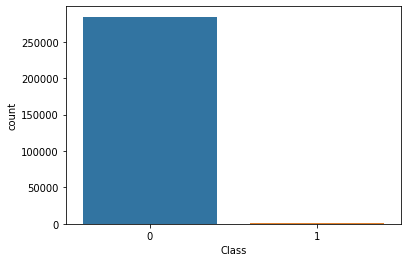

In [ ]:
sns.countplot(df['Class'])

**observation**: unbalanced data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


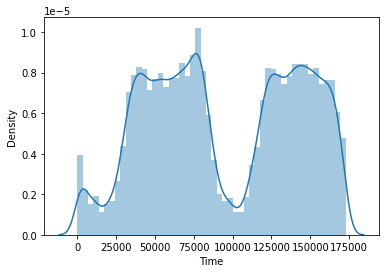

In [ ]:
sns.distplot(df['Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


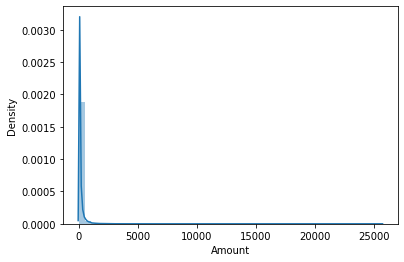

In [ ]:
sns.distplot(df['Amount'])

**observation**: the data is uneven and there is huge difference between the value range, so we will perform transformation

In [ ]:
x= df.drop(columns=['Class'],axis=1)
y=df['Class']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x= sc.fit_transform(x)

Step 4: **Training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(scaled_x,y, test_size=0.25, random_state=101, stratify=y )
#stratify :same proportions of examples in each class as observed in the original dataset.

1.**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(y_test,y_pred))
f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.63      0.74       123

    accuracy                           1.00     71202
   macro avg       0.95      0.82      0.87     71202
weighted avg       1.00      1.00      1.00     71202



0.7428571428571429

2. **Random Forest**

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#model= RandomForestClassifier(n_jobs=-1)
#model.fit(x_train,y_train)
#y_pred= model.predict(x_test)
#from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

Step 5: **balancing the data using SMOTE**

*SMOTE is an algorithm that performs data augmentation by creating synthetic data points based on the original data points. SMOTE can be seen as an advanced version of oversampling, or as a specific algorithm for data augmentation. The advantage of SMOTE is that you are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


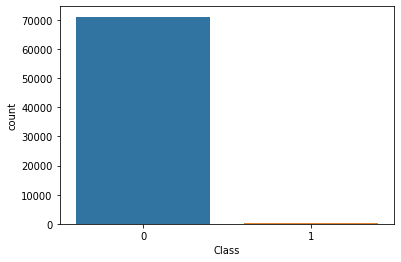

In [ ]:
#unbalanced
sns.countplot(y_test)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
over_sample=SMOTE()
x_smote, y_smote= over_sample.fit_resample(x_train,y_train)
x_smote_test, y_smote_test= over_sample.fit_resample(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


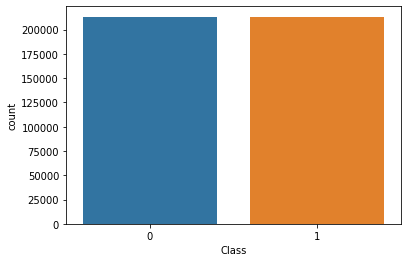

In [ ]:
##after balancing
sns.countplot(y_smote)

# **Logistic Regression (on modified data)**

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_smote,y_smote)
y_pred= model.predict(x_smote_test)
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(y_smote_test,y_pred))
print("F1 Score:")
f1_score(y_smote_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     71079
           1       0.97      0.93      0.95     71079

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158

F1 Score:


0.948196381237755

**observation**: earlier the F1 score of our logistic regression model was **0.742** but after handling the imbalanced data the F1 score of this model is **0.948** which is pretty good

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2= KNeighborsClassifier(n_neighbors = 5)
model2.fit(x_smote,y_smote)


KNeighborsClassifier()

In [ ]:
y_pred= model2.predict(x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print(classification_report(y_smote_test,y_pred))
print("F1 Score:")
f1_score(y_smote_test, y_pred)

KeyboardInterrupt: ignored